In [1]:
 import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical


In [2]:
 (X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
 print(f'shape of X_train: {X_train.shape}')

shape of X_train: (60000, 28, 28)


In [4]:
X_train.shape


(60000, 28, 28)

In [5]:
 X_test.shape

(10000, 28, 28)

In [6]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [7]:
X_train=X_train/255
X_test=X_test/255  #normalization

In [8]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
#one hot encoding
y_test=to_categorical(y_test) #images so as class/labels,"only"
y_train=to_categorical(y_train)

In [11]:
y_test


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_train[0]#one sequence

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

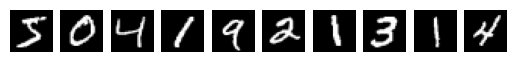

In [14]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
plt.show()    #preprocss over

In [15]:
#model creation
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D



In [16]:
model=Sequential()
model.add(Conv2D(filters=25,kernel_size=(3,3),activation='relu',input_shape= (28,28,1)))
model.add(MaxPooling2D(2,2))#poolingsize,stride
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) #output as probability
          

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 25)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
history=model.fit(X_train,y_train,epochs=4,validation_split=0.2)
#y=output(class/labl)

Epoch 1/4
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0568 - val_accuracy: 0.9833
Epoch 2/4
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0383 - val_accuracy: 0.9888
Epoch 3/4
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0407 - val_accuracy: 0.9878
Epoch 4/4
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0475 - val_accuracy: 0.9871


In [37]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0527 - accuracy: 0.9838


[0.05273551493883133, 0.9837999939918518]

In [38]:
model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


array([[1.5392628e-07, 1.1299378e-05, 9.7202417e-07, ..., 9.9995255e-01,
        1.4007870e-08, 1.1199819e-05],
       [6.0786833e-06, 4.4060853e-05, 9.9994063e-01, ..., 1.8051875e-06,
        3.9696818e-07, 3.2076961e-09],
       [7.3319512e-07, 9.9998140e-01, 9.2055228e-07, ..., 1.0570871e-05,
        3.4315906e-06, 9.6363024e-08],
       ...,
       [3.9525149e-14, 6.5890301e-12, 8.7059674e-12, ..., 2.7624007e-11,
        3.6011907e-09, 3.1974154e-10],
       [2.1065875e-07, 2.4475802e-10, 4.7520966e-11, ..., 1.7381190e-10,
        3.3077871e-05, 3.6436202e-08],
       [7.9131679e-09, 3.3576050e-10, 7.8472794e-08, ..., 2.2115137e-13,
        8.3364817e-08, 4.0119633e-10]], dtype=float32)

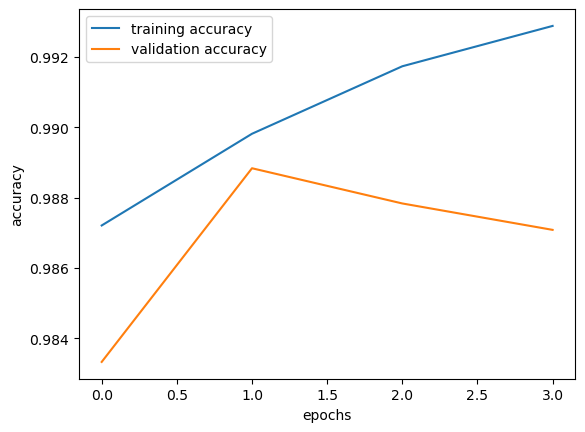

In [39]:
#plot graph of accuracy nd epochs
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
#to see graph
plt.legend();

# using CIFAR10

In [40]:
 import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

In [41]:
 (X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 339s 2us/step


In [42]:
X_train.shape


(50000, 32, 32, 3)

In [43]:
 X_test.shape

(10000, 32, 32, 3)

In [45]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [46]:
X_train=X_train/255
X_test=X_test/255  #normalization

In [47]:
#one hot encoding
y_test=to_categorical(y_test) #images so as class/labels,"only"
y_train=to_categorical(y_train)

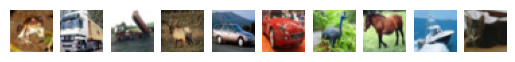

In [48]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
plt.show()    #preprocss over

In [49]:
#model creation
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D



In [55]:
model=Sequential()
model.add(Conv2D(filters=25,kernel_size=(3,3),activation='relu',input_shape= (32,32,3)))
model.add(MaxPooling2D(2,2))#poolingsize,stride
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) #output as probability
          

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 25)        700       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 25)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        14464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 64)         

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
history=model.fit(X_train,y_train,epochs=4,validation_split=0.2)
#y=output(class/labl)

Epoch 1/4
1250/1250 [==============================] - 33s 22ms/step - loss: 1.5871 - accuracy: 0.4199 - val_loss: 1.3292 - val_accuracy: 0.5236
Epoch 2/4
1250/1250 [==============================] - 27s 22ms/step - loss: 1.2365 - accuracy: 0.5605 - val_loss: 1.1959 - val_accuracy: 0.5808
Epoch 3/4
1250/1250 [==============================] - 27s 21ms/step - loss: 1.0893 - accuracy: 0.6160 - val_loss: 1.0776 - val_accuracy: 0.6242
Epoch 4/4
1250/1250 [==============================] - 28s 22ms/step - loss: 0.9840 - accuracy: 0.6534 - val_loss: 1.0772 - val_accuracy: 0.6322


In [61]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 9ms/step - loss: 1.0777 - accuracy: 0.6267


[1.0776878595352173, 0.6266999840736389]

In [69]:
model.predict(X_test)

313/313 [==============================] - 3s 7ms/step


array([[5.0413180e-02, 1.4444023e-02, 4.1545745e-02, ..., 5.9046075e-03,
        6.2231469e-01, 7.2261900e-02],
       [1.3411871e-01, 5.5861801e-01, 4.5119177e-05, ..., 4.6819050e-06,
        2.5773454e-01, 4.9470328e-02],
       [8.1508875e-02, 1.9544436e-01, 1.6240602e-03, ..., 1.9543694e-04,
        3.1442603e-01, 4.0583140e-01],
       ...,
       [1.5505954e-03, 2.2117085e-04, 4.4433713e-02, ..., 2.7565015e-02,
        1.1029354e-03, 2.5246865e-03],
       [5.1961178e-01, 2.2309099e-01, 1.9772388e-02, ..., 1.6873384e-02,
        2.4083722e-03, 2.5972171e-02],
       [4.4582807e-04, 6.1546278e-05, 6.6509969e-03, ..., 8.6235774e-01,
        1.1463010e-05, 3.8318089e-05]], dtype=float32)

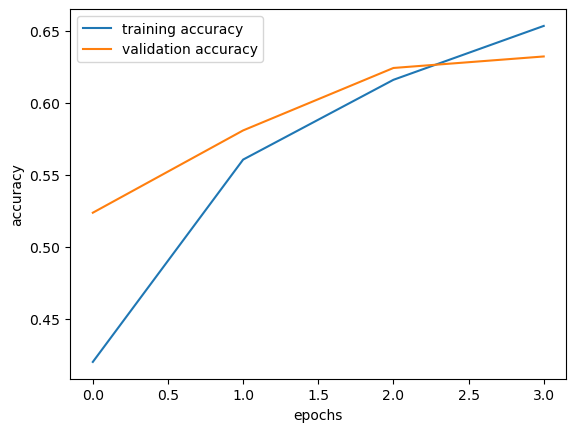

In [71]:
#plot graph of accuracy nd epochs
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
#to see graph
plt.legend();